# Iris Dataset Using Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Storing Iris Dataset into a variable called data
data = pd.read_csv('C:/Users/Ameen/ML PROJECTS/Iris DataSets/datasets/Iris.csv')

In [3]:
#Print the first five rows of the dataset
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
#Check is there any null values present in dataset
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#By running the above cells we conclude that:
1) There are 150 Observations with 4 features each (SepalLength , SepalWidth , PetalLength  , PetalWidth).
2) There are no null values , so we don't have to worry about that.
3) There are 50 Observations of each species (setosa , versicolor , virginica).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

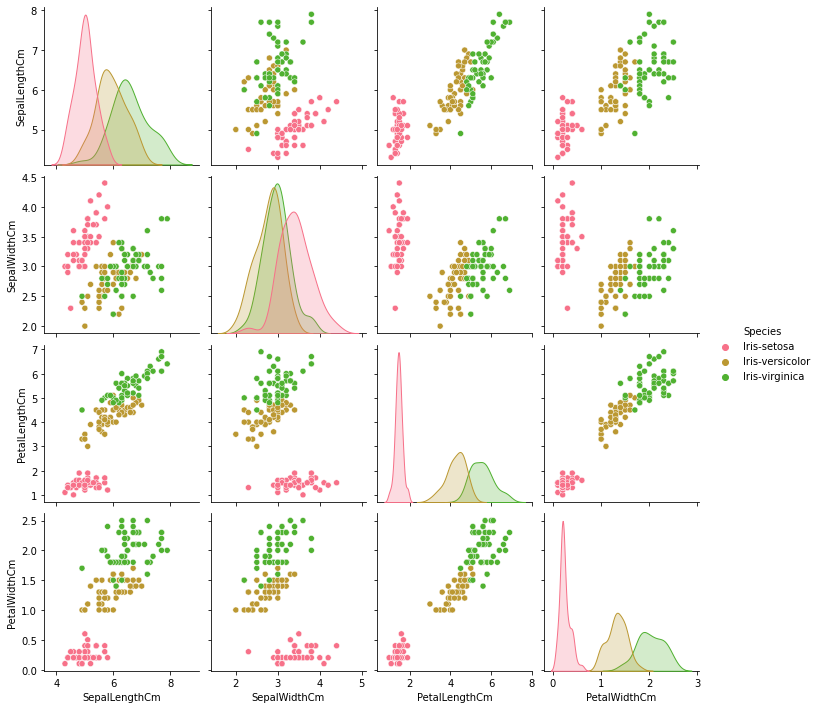

In [9]:
plm = data.drop('Id' , axis= 1)
g = sns.pairplot(plm , hue = 'Species' , markers= 'o')
plt.show()

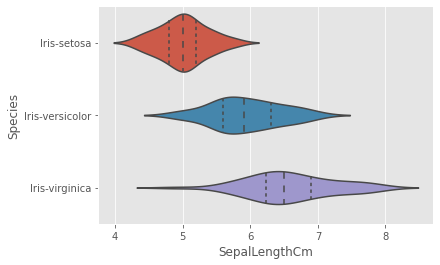

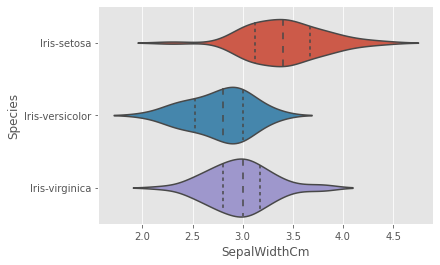

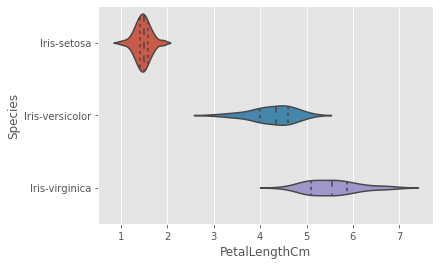

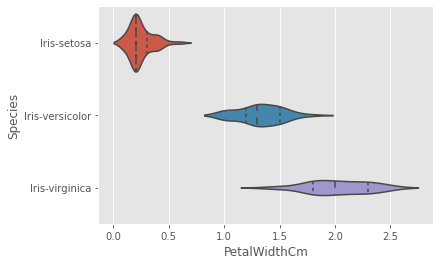

In [10]:
plt.style.use('ggplot')
a = sns.violinplot(x = 'SepalLengthCm' , y = 'Species' , data = data , inner = 'quartile')
plt.show()
b = sns.violinplot(x = 'SepalWidthCm' , y = 'Species' , data = data , inner = 'quartile')
plt.show()
c = sns.violinplot(x = 'PetalLengthCm' , y = 'Species' , data = data , inner = 'quartile')
plt.show()
d = sns.violinplot(x = 'PetalWidthCm' , y = 'Species' , data = data , inner = 'quartile')
plt.show()

# Modeling With Scikit - Learn

In [11]:
X = data.drop(['Id' , 'Species'] , axis = 1)
y = data['Species']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)


# Split the dataset into a training set and a testing set

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.4 , random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


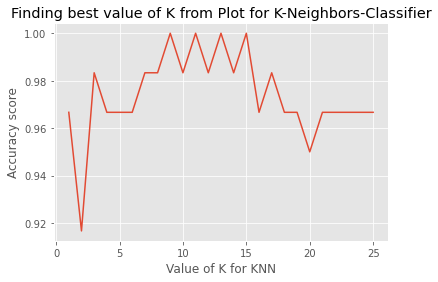

In [18]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred))
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Accuracy score")
plt.title("Finding best value of K from Plot for K-Neighbors-Classifier")
plt.show()


In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9833333333333333


# Choosing KNN to model Iris Species prediction with K=12

After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set

In [33]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)

knn.predict([[6,3,4,2]])



array(['Iris-versicolor'], dtype=object)

In [34]:
knn.predict([[3,2,1,3]])

array(['Iris-setosa'], dtype=object)